# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Logistic Regression Diabetes - Utkarsh Gaikwad</p>

## About Dataset

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict Diabetes based on diagnostic measurements whether a patient has diabetes.

### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* `Pregnancies`: Number of times pregnant
* `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-Hour serum insulin (mu U/ml)
* `BMI`: Body mass index (weight in kg/(height in m)^2)
* `DiabetesPedigreeFunction`: Diabetes pedigree function
* `Age`: Age in years
* `Outcome`: Class variable (0 or 1) This is our Target Variable. class value 1 is interpreted as "tested positive for
diabetes"

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read Dataset</p>

## Read Dataset

In [1]:
import pandas as pd 
df = pd.read_csv('/config/workspace/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values</p>

In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### No Missing Values found in dataset

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicate Values</p>

In [4]:
df.duplicated().sum()

0

### No Duplicated Values found

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Exploratory Data Analysis</p>

## Describe the Dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
m = df.min()
m

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [7]:
m[m==0]

Pregnancies      0.0
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
Outcome          0.0
dtype: float64

In [8]:
lst = list(m[m==0].index)
lst.remove('Outcome')
lst.remove('Pregnancies')
lst

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
# How many 0 values in above columns
for i in lst:
    print(f'{i} : {len(df[df[i]==0])}')

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [10]:
# Replacing 0 values with median value
for i in lst:
    df[i] = df[i].replace(0,df[i].median())

In [11]:
# After replacing 0 values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Value counts of Outcome variable

<Axes: title={'center': 'Value Counts of Outcome'}, xlabel='Outcome', ylabel='value_counts'>

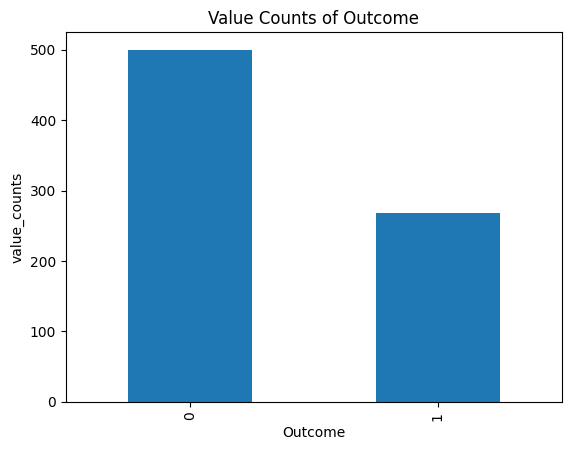

In [12]:
df['Outcome'].value_counts().plot(kind='bar',ylabel='value_counts',title='Value Counts of Outcome')

### Univariate Analysis

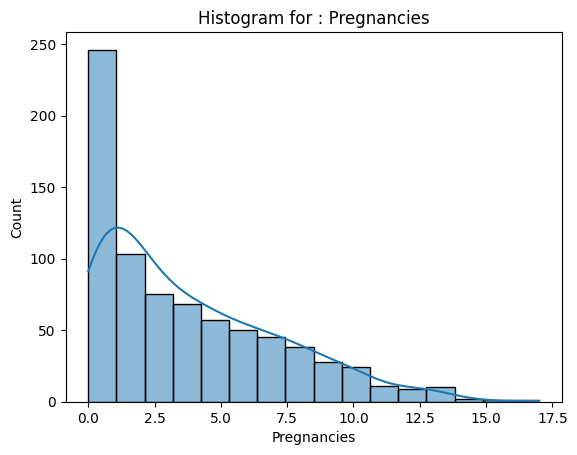

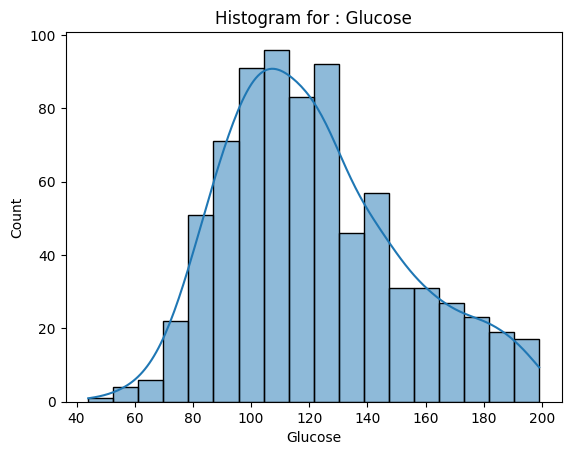

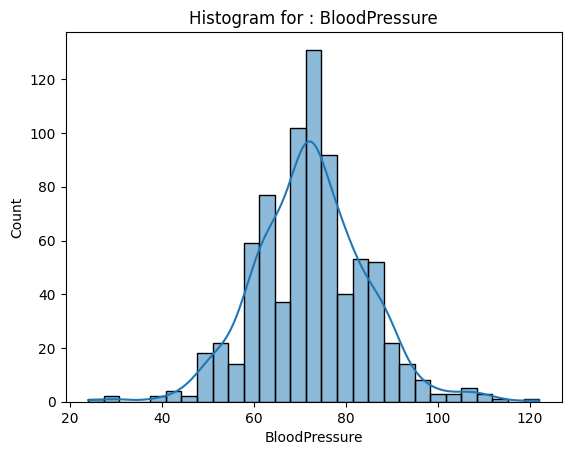

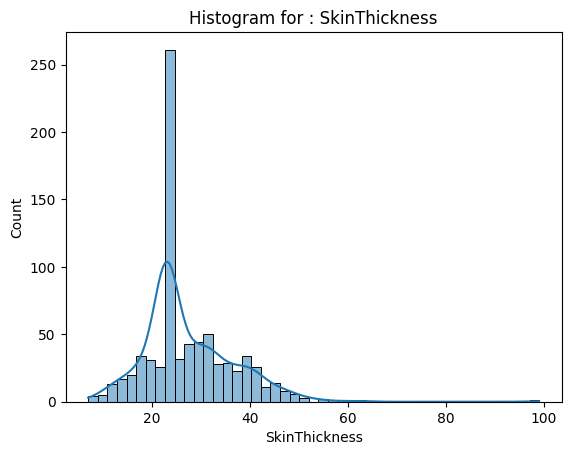

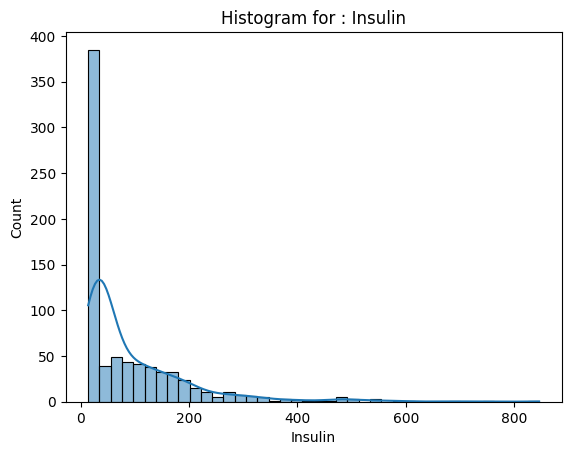

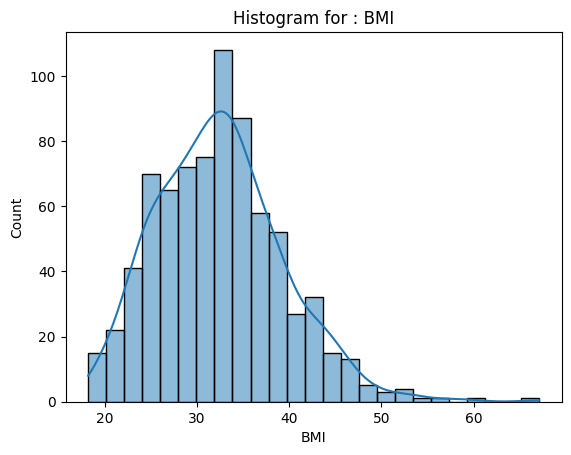

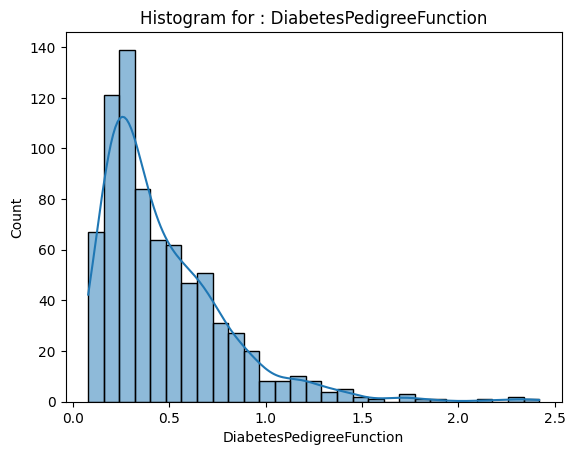

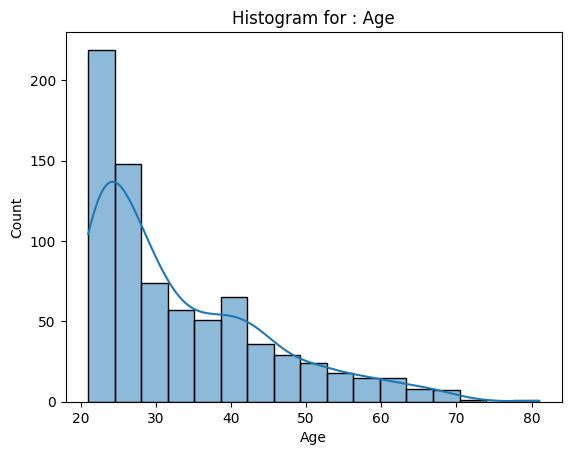

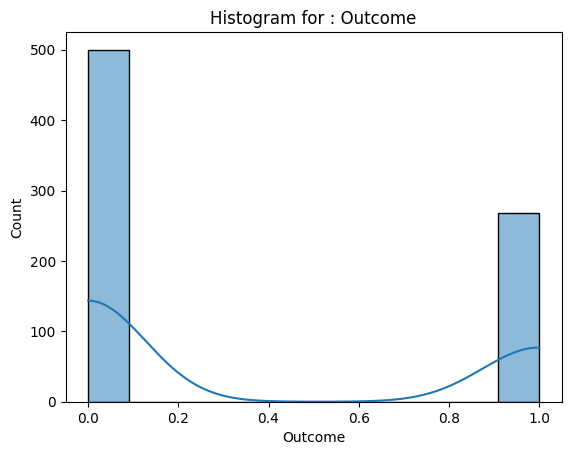

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for : {i}')
    plt.show()
    print('\n\n')

## Bivariate Analysis

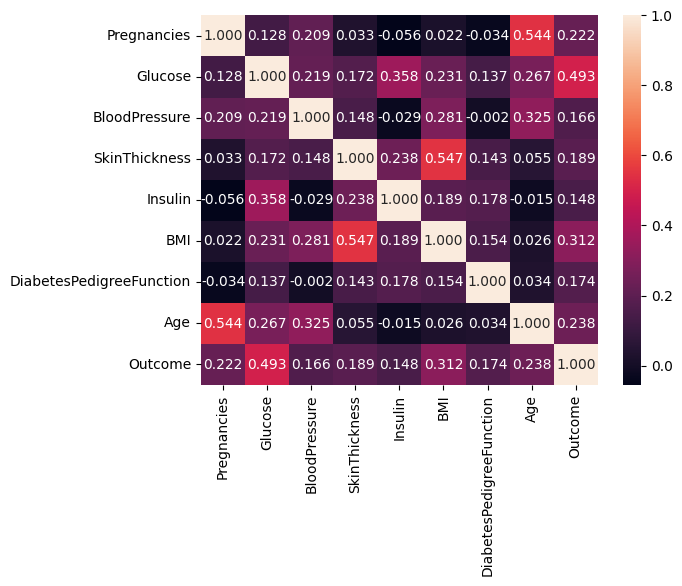

In [14]:
sns.heatmap(df.corr(),annot=True, fmt='.3f')
plt.show()

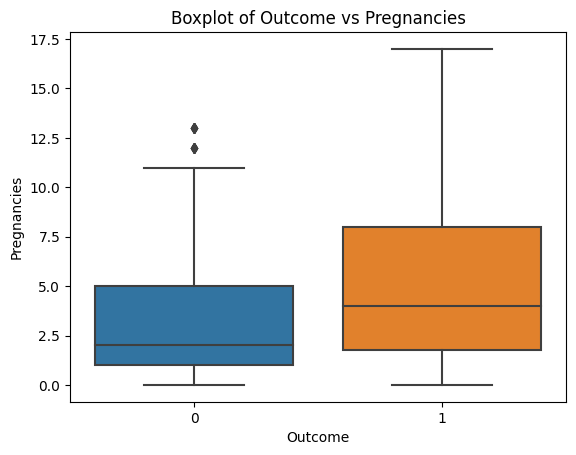

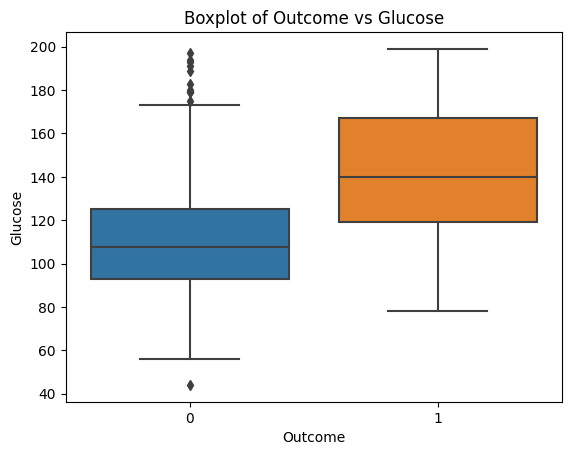

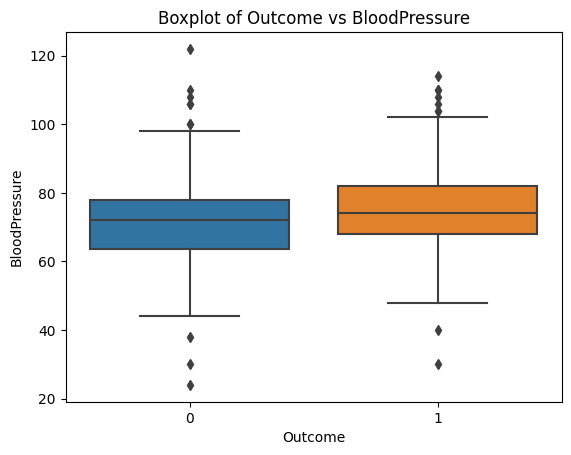

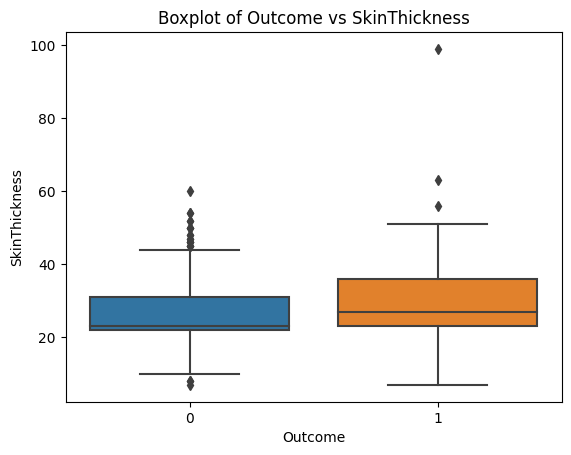

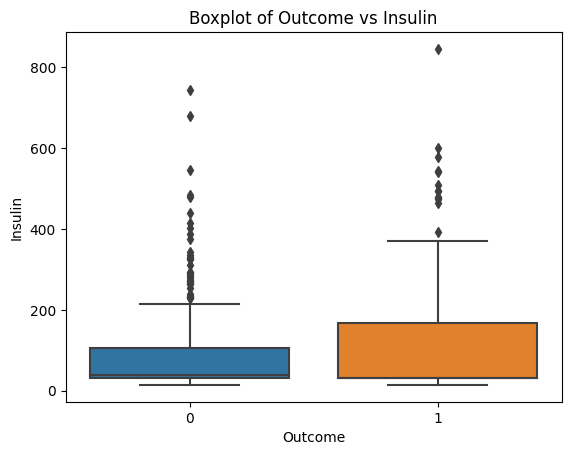

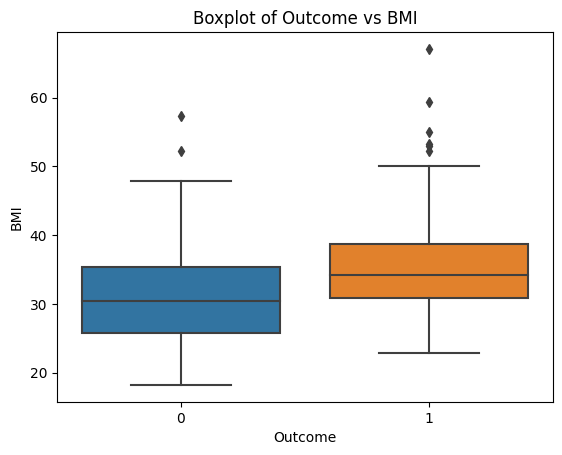

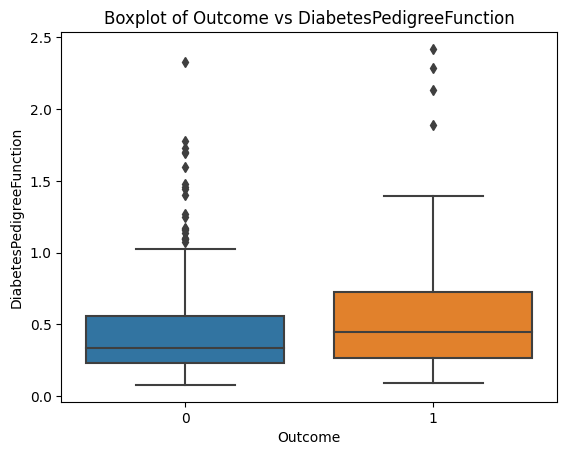

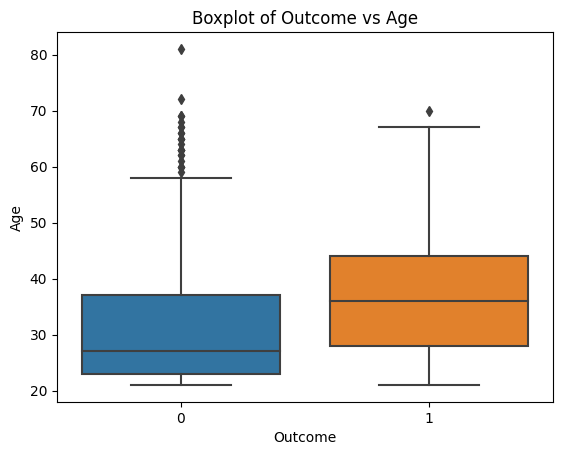

In [15]:
# Boxplot w.r.t. outcome
for i in df.columns:
    if i !='Outcome':
        sns.boxplot(data=df,x='Outcome',y=i)
        plt.title(f'Boxplot of Outcome vs {i}')
        plt.show()
        print('\n\n')

## Pairplot

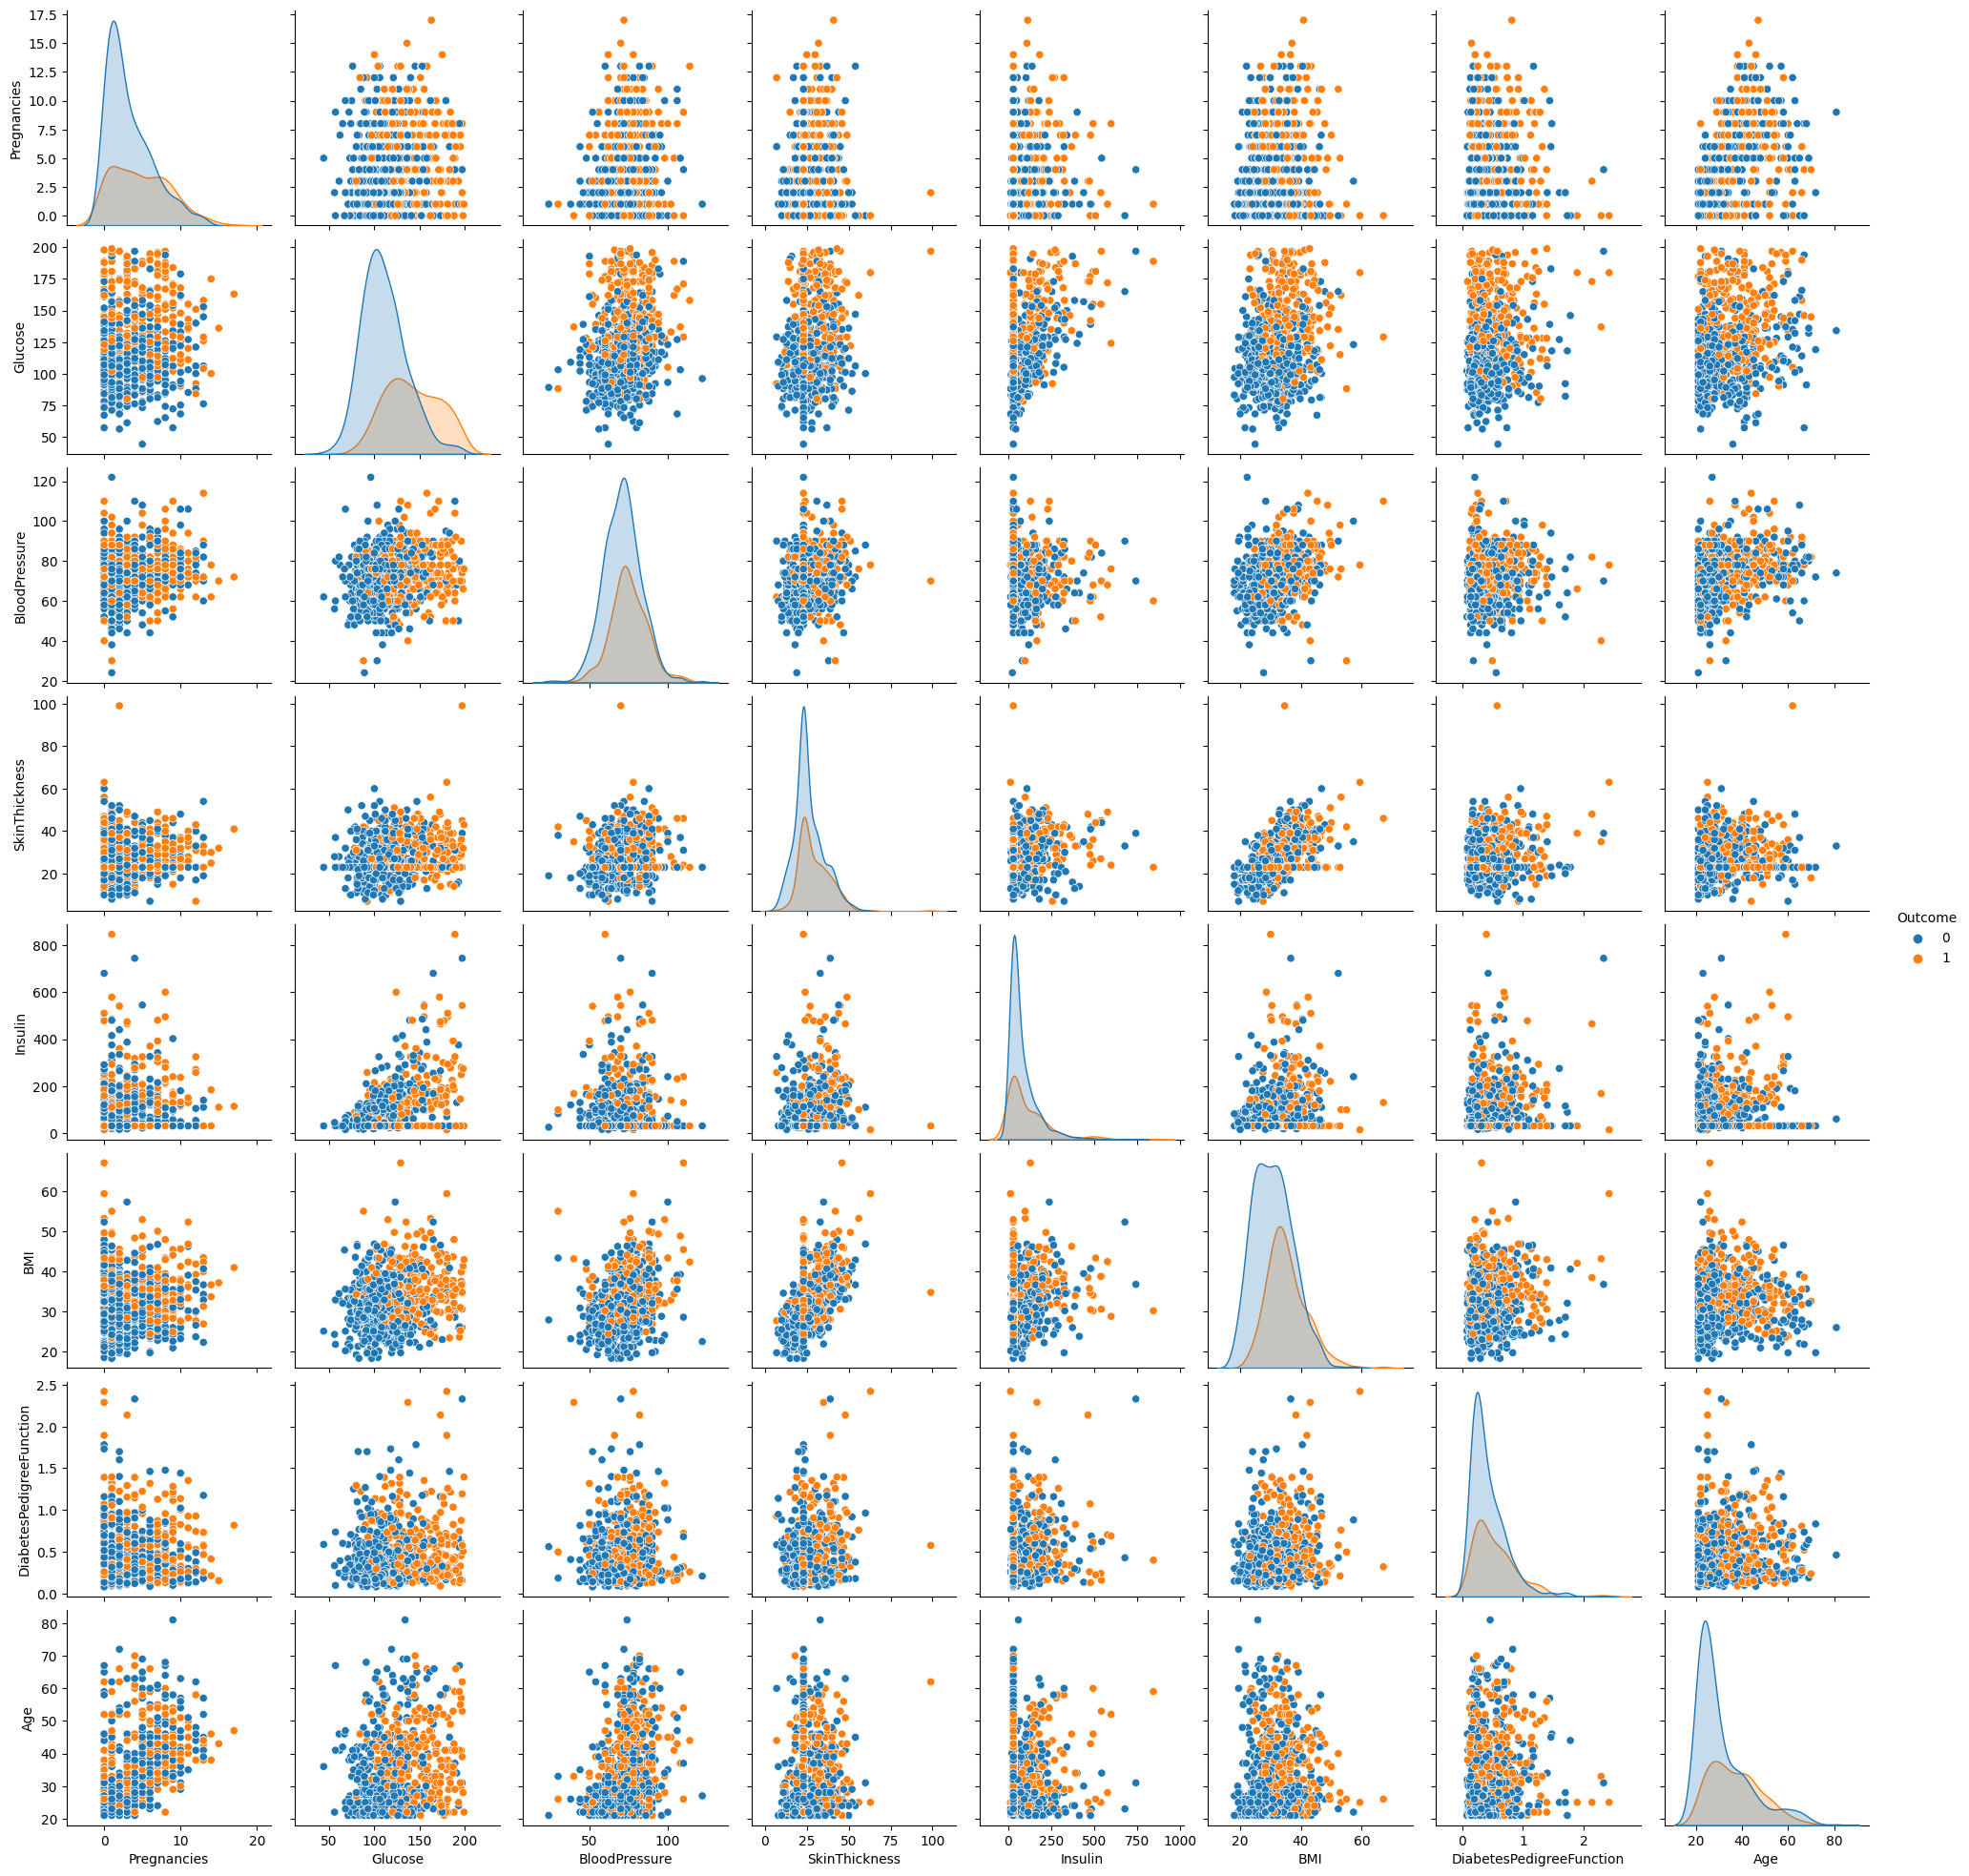

In [16]:
sns.pairplot(df, hue='Outcome')

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Mutual Information Index</p>

## Seperate X and Y

In [17]:
X = df.drop(labels=['Outcome'],axis=1)
Y = df[['Outcome']]

In [18]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [19]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

Glucose                     0.117733
BMI                         0.082850
Pregnancies                 0.060985
Age                         0.051395
Insulin                     0.016514
DiabetesPedigreeFunction    0.014590
SkinThickness               0.009217
BloodPressure               0.001763
Name: MI Scores, dtype: float64


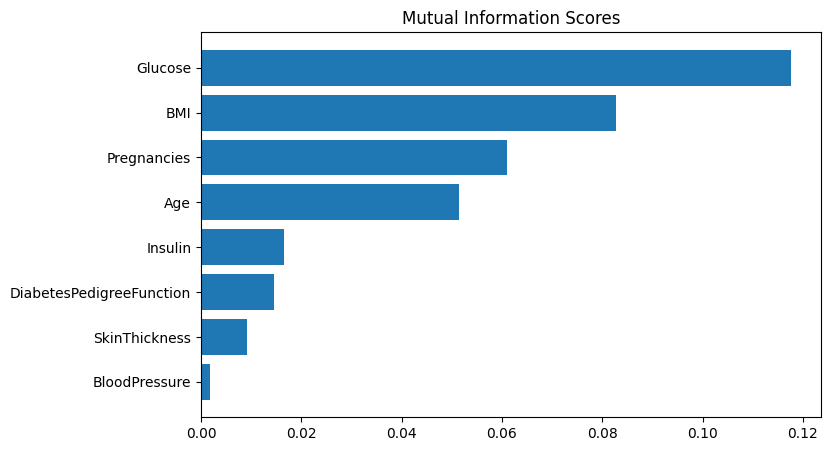

In [20]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Train Test Split</p>

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=0)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Standard Scaling</p>

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [23]:
# Saving scaler to pickle file
import pickle
with open('/config/workspace/model/stdscaler.pkl','wb') as file:
    pickle.dump(scaler, file)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Logistic Regression Training</p>

## Base Model

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain.values.flatten())

LogisticRegression()

In [25]:
ytest_pred = log_reg.predict(xtest)
ytest_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [26]:
from sklearn.metrics import classification_report
print('Classification Report for Base model : \n')
print(classification_report(ytest,ytest_pred))

Classification Report for Base model : 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [27]:
from sklearn.metrics import accuracy_score, f1_score
ts_acc_base = accuracy_score(ytest, ytest_pred)
print(f'Test Base Accuracy : {ts_acc_base:.4f}')
ts_f1_base = f1_score(ytest, ytest_pred)
print(f'Test Base F1 : {ts_f1_base:.4f}')

Test Base Accuracy : 0.7969
Test Base F1 : 0.6486


In [28]:
from sklearn.metrics import roc_auc_score
yprob = log_reg.predict_proba(xtest)[:,-1]
roc_base = roc_auc_score(ytest,yprob)
print(f'ROC AUC Score for base model is : {roc_base:.4f}')

ROC AUC Score for base model is : 0.8612


## Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# Parameter Grid
parameters = {
    'penalty':['l1','l2'],
    'C'      :np.logspace(-3,3,7),
    'solver' :['newton-cg','lbfgs','liblinear'],
}

In [30]:
logreg = LogisticRegression()
gscv = GridSearchCV(logreg,
                    param_grid = parameters,
                    scoring='accuracy',
                    cv=10)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [31]:
gscv.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
gscv.best_score_

0.763793103448276

In [33]:
ytest_pred_tuned = gscv.predict(xtest)

In [34]:
from sklearn.metrics import classification_report
print('Classification Report after Hyperparameter Tuning :')
print(classification_report(ytest,ytest_pred_tuned))

Classification Report after Hyperparameter Tuning :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [35]:
from sklearn.metrics import accuracy_score, f1_score
ts_acc_tuned = accuracy_score(ytest, ytest_pred_tuned)
print(f'Test Tuned Accuracy : {ts_acc_base:.4f}')
ts_f1_tuned = f1_score(ytest, ytest_pred_tuned)
print(f'Test Tuned F1 : {ts_f1_base:.4f}')

Test Tuned Accuracy : 0.7969
Test Tuned F1 : 0.6486


<Axes: >

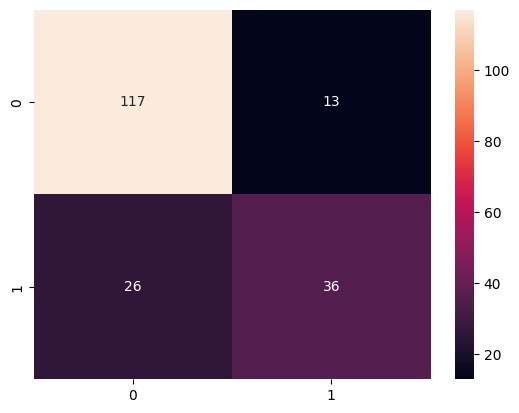

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(ytest,ytest_pred_tuned)
sns.heatmap(conf_mat,annot=True,fmt='d')

In [37]:
from sklearn.metrics import roc_auc_score
ytest_prob = gscv.predict_proba(xtest)[:,-1]
roc = roc_auc_score(ytest,ytest_prob)
print(f'ROC AUC Score is : {roc:.4f}')

ROC AUC Score is : 0.8618


## Comparing base model and tuned model test data

In [38]:
dct = {
    'models':['base','tuned'],
    'accuracy':[ts_acc_base,ts_acc_tuned],
    'f1':[ts_f1_base,ts_f1_tuned],
    'roc_auc':[roc_base,roc]
}

In [39]:
df_compare = pd.DataFrame(dct)
df_compare

,models,accuracy,f1,roc_auc
0,base,0.796875,0.648649,0.861166
1,tuned,0.796875,0.648649,0.861787


## Tuned Model is having slightly better roc_auc Score

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Pickling the model</p>

In [40]:
# Pickling the model
import pickle
with open('/config/workspace/model/model.pkl','wb') as file:
    pickle.dump(gscv,file)